In [1]:
%matplotlib notebook
#%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
import scipy.signal

from ipywidgets import interact
import ipywidgets as widgets

<IPython.core.display.Javascript object>


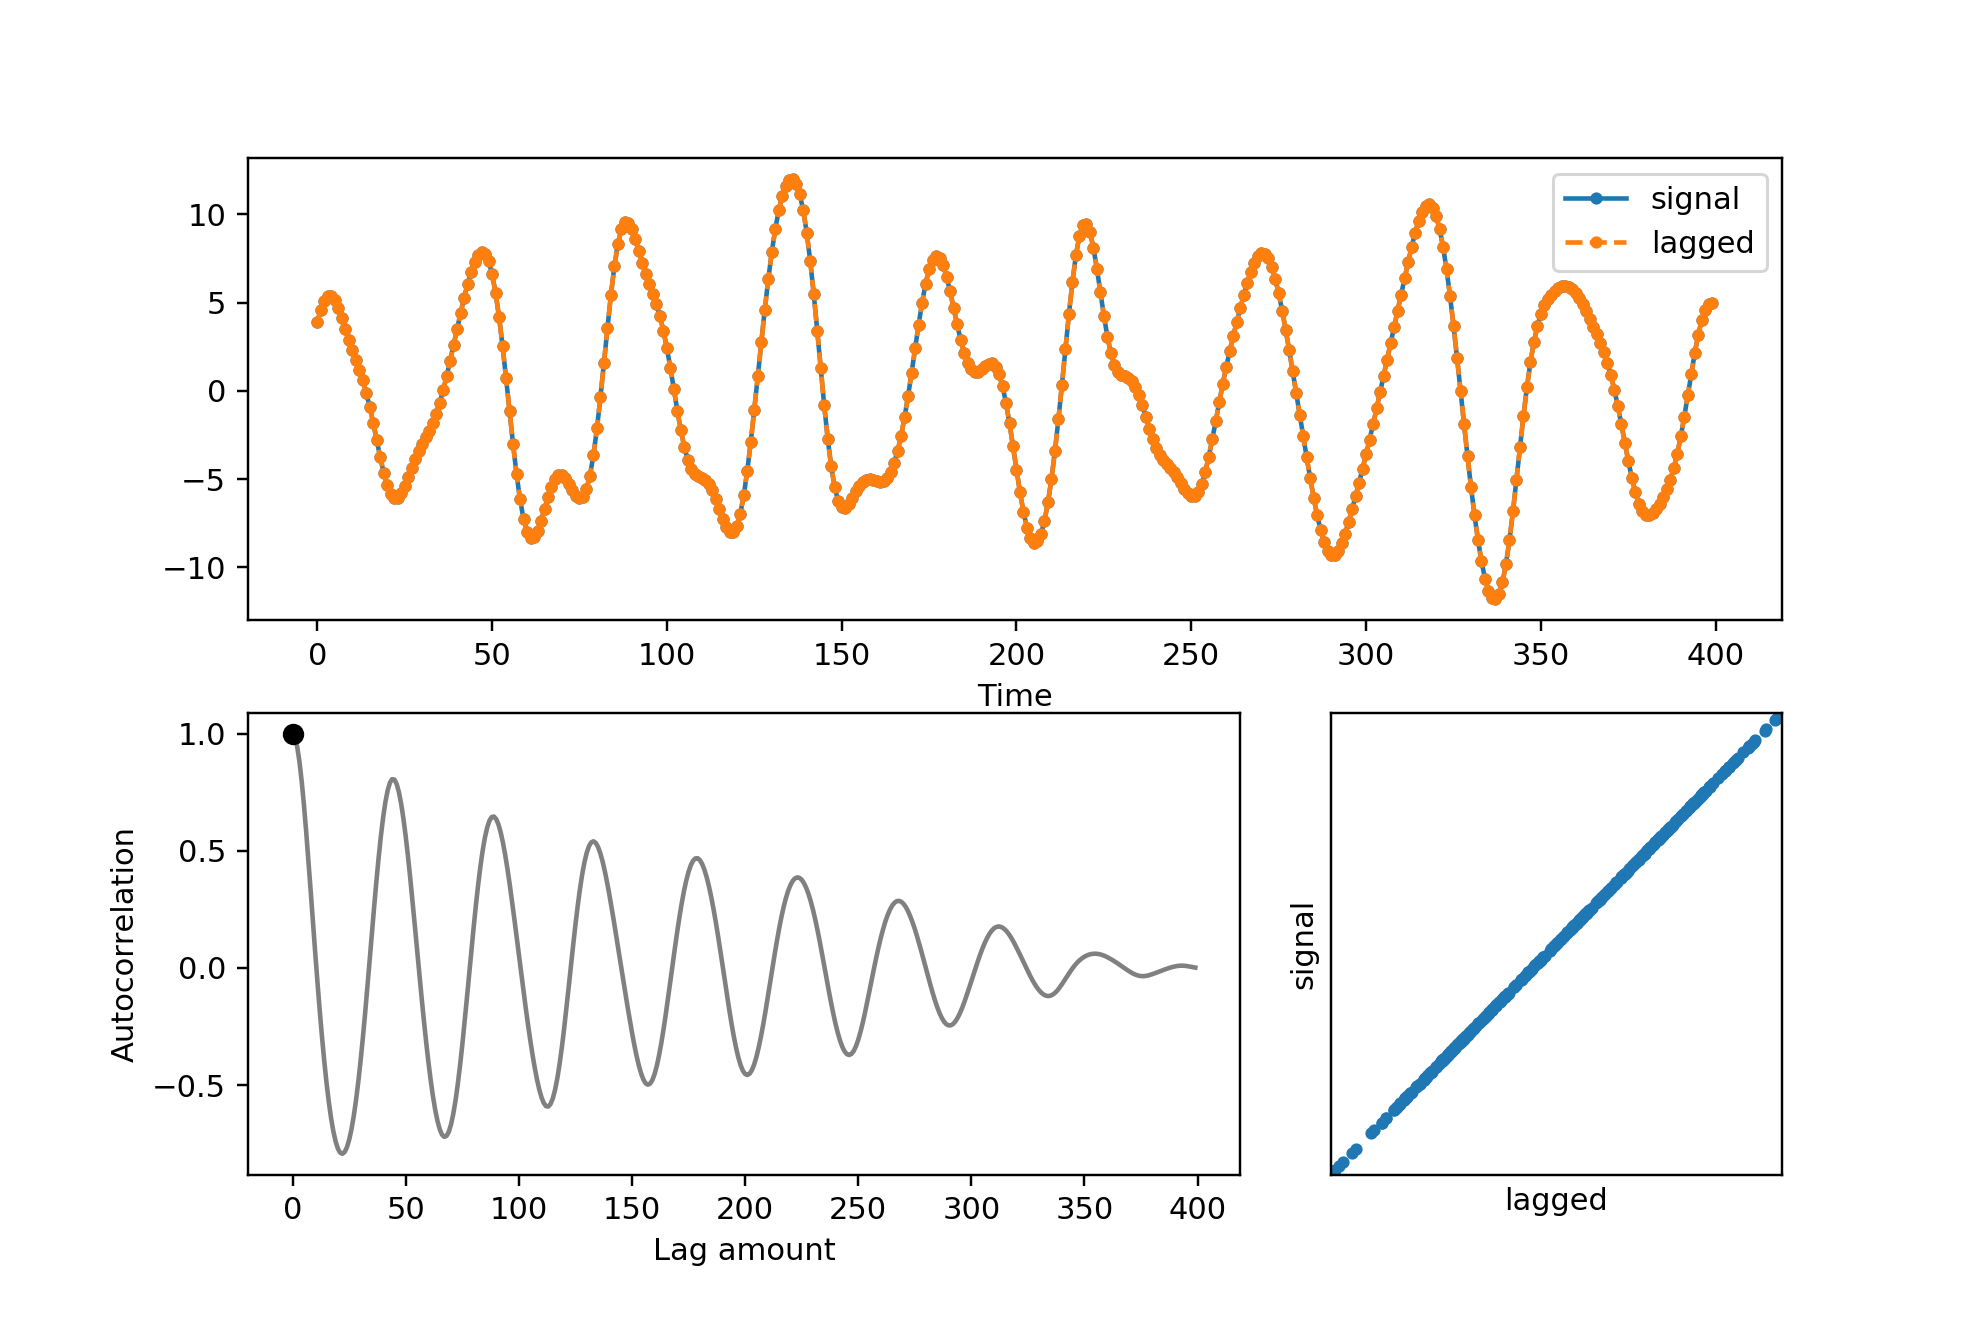

interactive(children=(IntSlider(value=0, description='shift', max=50), Output()), _dom_classes=('widget-intera…

In [90]:
smooth = True
bandpass = True
oscillatory = True

plt.figure(figsize=(9,6))

n = 400
rough_arr = np.random.randn(n)
if oscillatory:
    rough_arr += np.sin(np.linspace(0, 50*n, n))
kernel = np.exp(-np.linspace(-5, 5, 100)**2) 
if bandpass:
    kernel *= np.sin(np.linspace(-10, 10, 100))

if smooth: 
    signal = np.convolve(rough_arr, kernel, 'same')
else:
    signal = rough_arr

autocorr = scipy.signal.correlate(signal, signal)[n-1:] / (n * signal.var())

#plt.subplot(3,1,1)
plt.subplot2grid((2,3), (0,0), colspan=3)
signal_line = plt.plot(signal, '.-', label='signal')
shift_line = plt.plot(signal, '.--', label='lagged')
#plt.xlabel("Time")
plt.legend(loc="upper right")
plt.xlabel("Time")

#plt.subplot(3,1,2)
plt.subplot2grid((2,3), (1,0), colspan=2)
autocorr_line = plt.plot(autocorr, '-', color='0.5')
autocorr_dot = plt.plot(0, autocorr[0], 'ko')
plt.ylabel("Autocorrelation")
plt.xlabel("Lag amount")

#plt.subplot(3,1,3)
plt.subplot2grid((2,3), (1,2))#, colspan=2, rowspan=2)
scatter_dots = plt.plot(signal, signal, '.')
absmax = np.abs(signal).max()
plt.ylim(-absmax, absmax)
plt.xlim(-absmax, absmax)
plt.xlabel("lagged")
plt.ylabel("signal")
#plt.gca().yaxis.tick_right()
plt.yticks([])
plt.xticks([])

def update(shift):
    shift_line[0].set_data(np.arange(n-shift), signal[shift:])
    autocorr_dot[0].set_data(shift, autocorr[shift])
    if shift>0:
        scatter_dots[0].set_data(signal[shift:], signal[:-shift])
    else:
        scatter_dots[0].set_data(signal, signal)

shift_slider = widgets.IntSlider(value=0, min=0, max=50, step=1)
interact(update, shift=shift_slider);

<IPython.core.display.Javascript object>


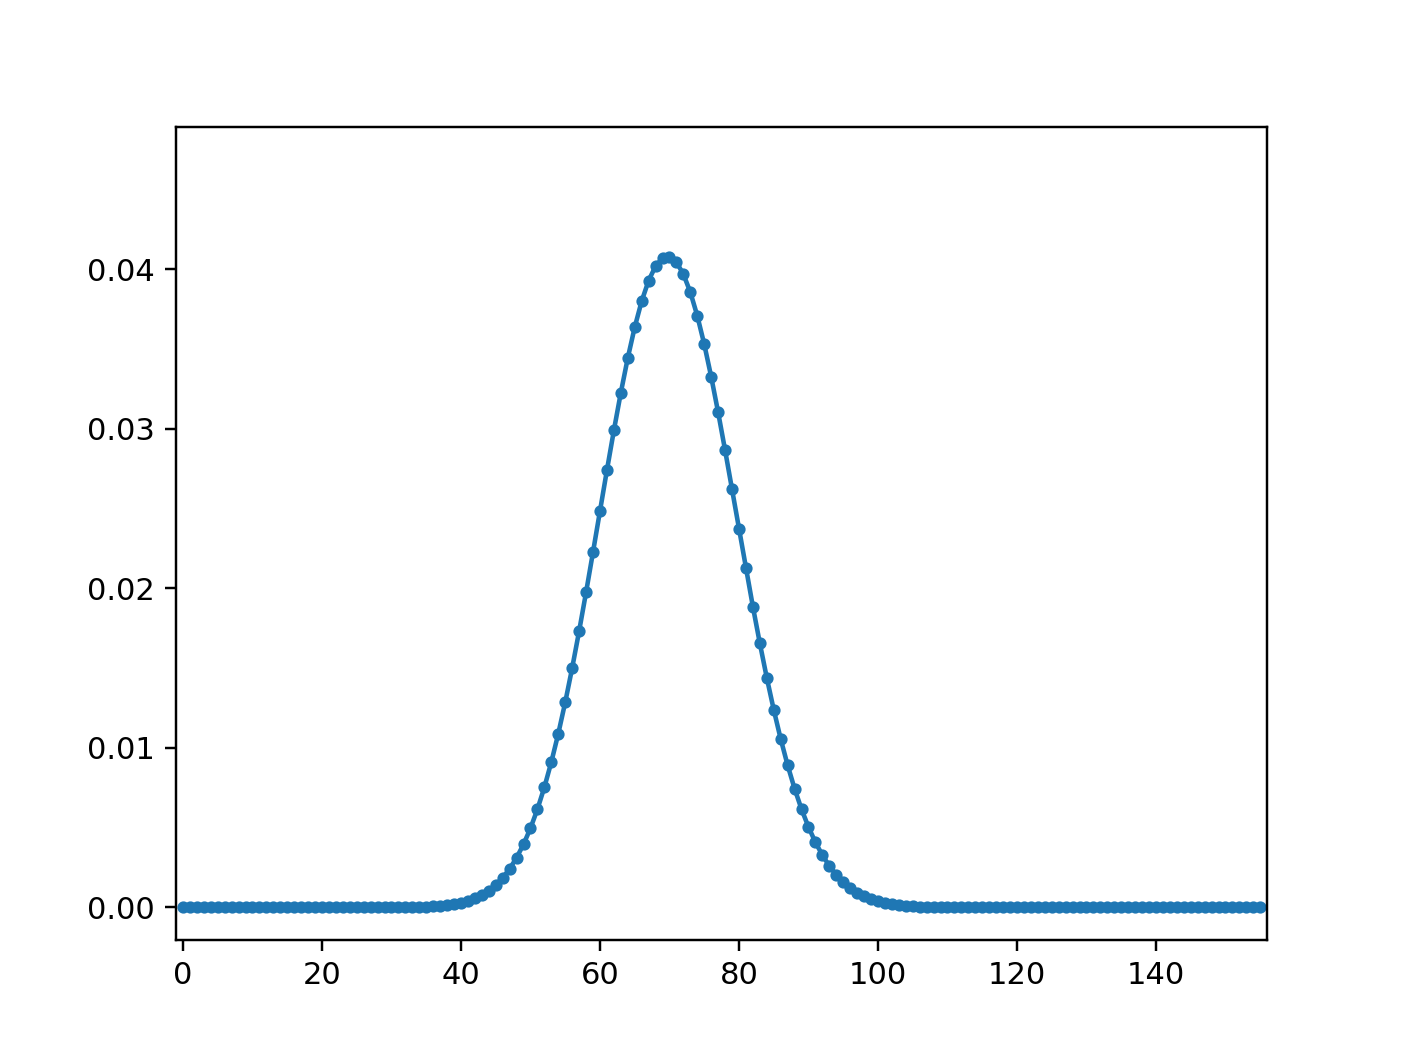

interactive(children=(IntSlider(value=0, description='num_convolutions', max=30), Output()), _dom_classes=('wi…

In [67]:
arr_orig = np.ones(6)
arr_orig = np.random.rand(6)
arr_orig /= arr_orig.sum()

conv_line = plt.plot(arr_orig, '.-')[0]
plt.ylim(-0.05*max(arr_orig), 1.2*max(arr_orig))

def update(num_convolutions):
    arr = arr_orig.copy()
    for _ in range(num_convolutions):
        arr = np.convolve(arr, arr_orig)
    
    conv_line.set_data(np.arange(len(arr)), arr)
    plt.xlim(-1, len(arr))
    plt.ylim(-0.05*max(arr), 1.2*max(arr))

nconv_slider = widgets.IntSlider(value=0, min=0, max=30, step=1)
interact(update, num_convolutions=nconv_slider);